In [9]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pylab as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

### Cargar Dataset preprocesado en Knime

In [3]:
series = pd.read_csv('./Modelos de ETL - Data Procesada/DataEntrenamiento1.csv')

series.head()

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
0,2013-01-01 01:00:00,0,17,0,0,0,0,0,0,0,0,0,0,0
1,2013-01-01 02:00:00,0,33,0,0,104,0,0,0,0,0,0,0,0
2,2013-01-01 03:00:00,0,20,0,0,129,0,0,0,0,0,0,0,0
3,2013-01-01 04:00:00,0,19,0,0,94,0,0,0,0,0,0,0,0
4,2013-01-01 05:00:00,0,28,0,0,0,0,0,0,0,0,0,0,0


### Mapeo de los datos presentes en cada estación.

In [4]:
series['DateTime'] = pd.to_datetime(series['DateTime'], format= '%Y-%m-%d %H:%M:%S')
a = series["DateTime"][0]
type(a)

pandas._libs.tslibs.timestamps.Timestamp

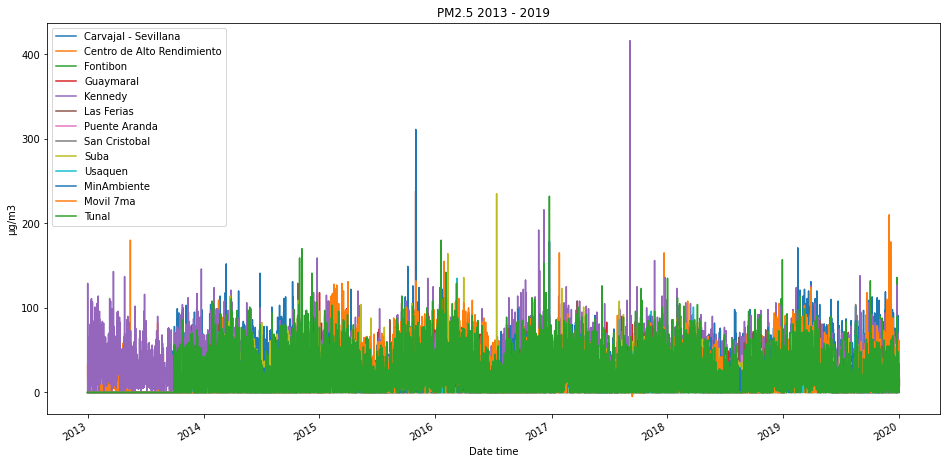

In [16]:
series.plot(x='DateTime',figsize=(16,8))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2013 - 2019');
pyplot.show()

### Eliminar Datos de 2013

In [17]:
series1 = series
series2 = series[(series['DateTime'] >= '2014-01-01')]
series2

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
8395,2014-01-01 01:00:00,19,5,0,0,32,0,0,0,0,3,0,0,0
8396,2014-01-01 02:00:00,42,9,0,0,69,0,0,0,0,6,0,0,0
8397,2014-01-01 03:00:00,23,11,0,0,51,22,0,0,0,5,0,0,0
8398,2014-01-01 04:00:00,8,24,0,0,31,21,0,0,0,3,0,0,0
8399,2014-01-01 05:00:00,10,12,0,0,10,5,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,2019-12-31 19:00:00,11,8,9,7,20,10,10,9,6,14,10,15,10
58761,2019-12-31 20:00:00,15,7,10,6,31,17,8,6,8,10,11,16,14
58762,2019-12-31 21:00:00,12,9,9,8,32,10,6,8,10,10,12,9,17
58763,2019-12-31 22:00:00,14,8,10,8,40,8,9,8,6,14,9,20,15


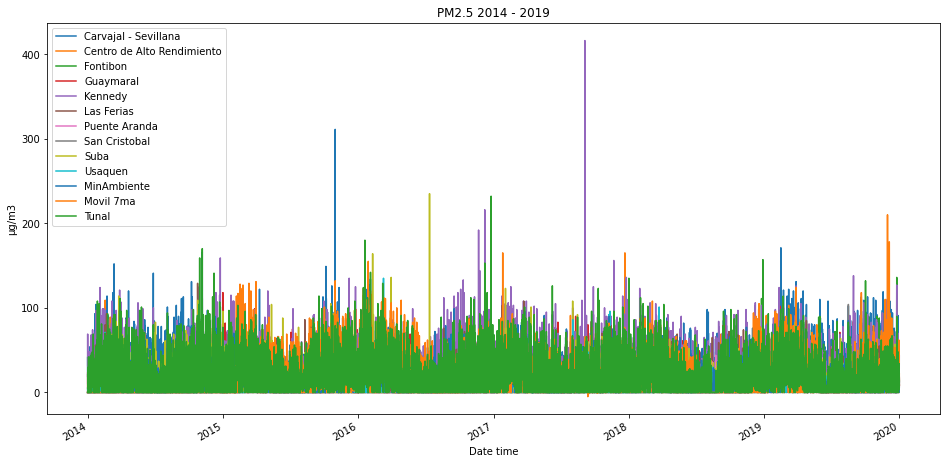

In [20]:
series2.plot(x='DateTime',figsize=(16,8))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2014 - 2019');
pyplot.show()

### Se mapean los valores faltantes en estaciones concretas ejemplo "Centro de Alto Rendimiento"

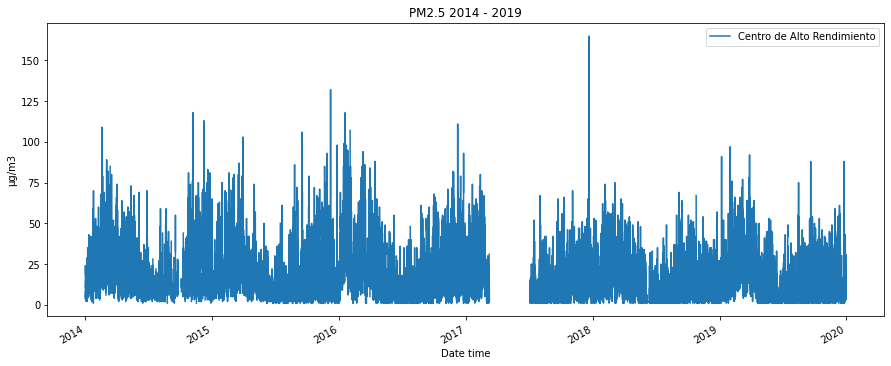

In [7]:
series3 = series2.replace({0:None})
# plot the data
series3.plot(x='DateTime', y='Centro de Alto Rendimiento', figsize=(15,6))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2014 - 2019');

### Se determinan los valores nulos presentes en la data de la estación

In [8]:
NullValues = pd.isnull(series3["Centro de Alto Rendimiento"]).values.ravel().sum()
NullValues

8311

### Tamaño del dataframe total

In [9]:
SizeDF = (len(series3.index))
SizeDF

50370

### Porcentaje de valores nulos en la data de "Centro de Alto Rendimiento"

In [10]:
(NullValues * 100 )/SizeDF

16.499900734564225

In [11]:
series3

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
8395,2014-01-01 01:00:00,19,5,None,None,32,None,None,None,None,3,None,None,None
8396,2014-01-01 02:00:00,42,9,None,None,69,None,None,None,None,6,None,None,None
8397,2014-01-01 03:00:00,23,11,None,None,51,22,None,None,None,5,None,None,None
8398,2014-01-01 04:00:00,8,24,None,None,31,21,None,None,None,3,None,None,None
8399,2014-01-01 05:00:00,10,12,None,None,10,5,None,None,None,3,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,2019-12-31 19:00:00,11,8,9,7,20,10,10,9,6,14,10,15,10
58761,2019-12-31 20:00:00,15,7,10,6,31,17,8,6,8,10,11,16,14
58762,2019-12-31 21:00:00,12,9,9,8,32,10,6,8,10,10,12,9,17
58763,2019-12-31 22:00:00,14,8,10,8,40,8,9,8,6,14,9,20,15


In [12]:
series3 = series3.fillna(method="ffill")
series3

,DateTime,Carvajal - Sevillana,Centro de Alto Rendimiento,Fontibon,Guaymaral,Kennedy,Las Ferias,Puente Aranda,San Cristobal,Suba,Usaquen,MinAmbiente,Movil 7ma,Tunal
8395,2014-01-01 01:00:00,19,5,NaN,NaN,32,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
8396,2014-01-01 02:00:00,42,9,NaN,NaN,69,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN
8397,2014-01-01 03:00:00,23,11,NaN,NaN,51,22.0,NaN,NaN,NaN,5,NaN,NaN,NaN
8398,2014-01-01 04:00:00,8,24,NaN,NaN,31,21.0,NaN,NaN,NaN,3,NaN,NaN,NaN
8399,2014-01-01 05:00:00,10,12,NaN,NaN,10,5.0,NaN,NaN,NaN,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,2019-12-31 19:00:00,11,8,9.0,7.0,20,10.0,10.0,9.0,6.0,14,10.0,15.0,10.0
58761,2019-12-31 20:00:00,15,7,10.0,6.0,31,17.0,8.0,6.0,8.0,10,11.0,16.0,14.0
58762,2019-12-31 21:00:00,12,9,9.0,8.0,32,10.0,6.0,8.0,10.0,10,12.0,9.0,17.0
58763,2019-12-31 22:00:00,14,8,10.0,8.0,40,8.0,9.0,8.0,6.0,14,9.0,20.0,15.0


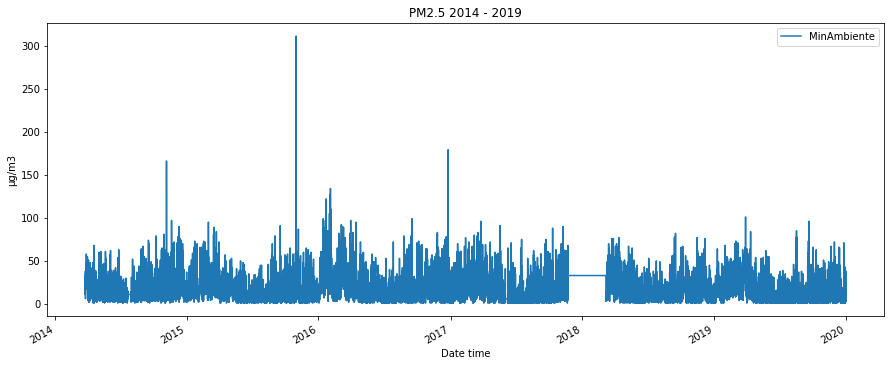

In [13]:
series3.plot(x='DateTime', y='MinAmbiente', figsize=(15,6))
plt.xlabel('Date time')
plt.ylabel('µg/m3')
plt.title('PM2.5 2014 - 2019');

### Implementación de metodo ARIMA para pronosticar datos faltantes

In [14]:
from datetime import datetime
def parser(x):
	return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
 
series2 = pd.read_csv('./DataMiningUSA/DataEntrenamiento3.csv', index_col=0, squeeze=True, date_parser=parser)
series2.head()

DateTime
2019-01-01 01:00:00     7
2019-01-01 02:00:00    20
2019-01-01 03:00:00    27
2019-01-01 04:00:00    21
2019-01-01 05:00:00    15
Name: Centro de Alto Rendimiento, dtype: int64

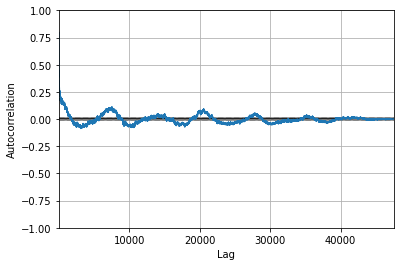

In [15]:
autocorrelation_plot(series2)
pyplot.show()

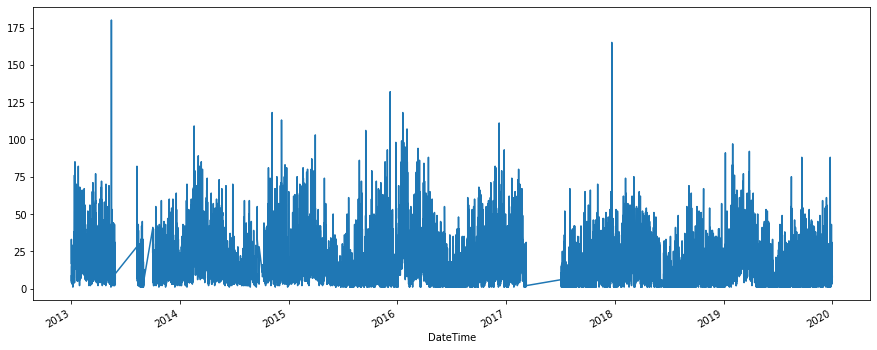

In [16]:
series2.plot(figsize=(15,6))
pyplot.show()

In [17]:
NullValues = pd.isnull(series2).values.ravel().sum()
NullValues

0

In [18]:
# fit model
model = ARIMA(series2, order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has bee

                                  ARIMA Model Results                                   
Dep. Variable:     D.Centro de Alto Rendimiento   No. Observations:                47525
Model:                           ARIMA(6, 1, 0)   Log Likelihood             -166645.100
Method:                                 css-mle   S.D. of innovations              8.065
Date:                          Fri, 31 Jul 2020   AIC                         333306.200
Time:                                  17:48:37   BIC                         333376.352
Sample:                                       1   HQIC                        333328.227
                                                                                        
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0001      0.017     -0.007      0.994    

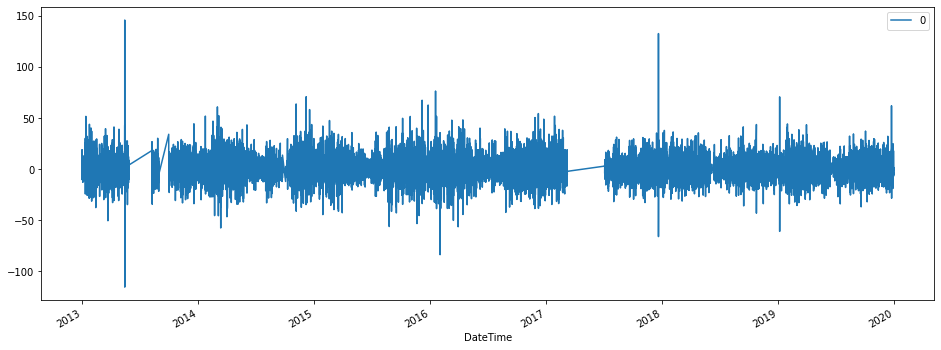

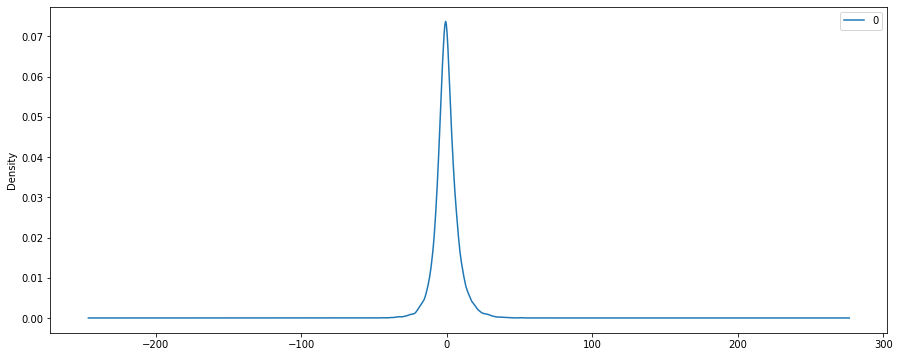

                  0
count  47525.000000
mean       0.000192
std        8.065093
min     -115.460578
25%       -4.111904
50%       -0.407747
75%        3.729712
max      145.930512


In [19]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(16,6))
pyplot.show()
residuals.plot(kind='kde',figsize=(15,6))
pyplot.show()
print(residuals.describe())

In [20]:
series5 = pd.read_csv('./DataMiningUSA/DataEntrenamiento2.csv', index_col=0, squeeze=True, date_parser=parser)
series5.head()

DateTime
2013-01-01 01:00:00    17
2013-01-01 02:00:00    33
2013-01-01 03:00:00    20
2013-01-01 04:00:00    19
2013-01-01 05:00:00    28
Name: Centro de Alto Rendimiento, dtype: int64

predicted=24.391587, expected=29.000000
predicted=25.815494, expected=24.000000
predicted=21.374428, expected=22.000000
predicted=20.493817, expected=14.000000
predicted=15.031852, expected=23.000000
predicted=23.571552, expected=16.000000
predicted=18.307543, expected=20.000000
predicted=20.273990, expected=21.000000
predicted=20.703774, expected=14.000000
predicted=14.895262, expected=8.000000
predicted=10.878703, expected=21.000000
predicted=19.670546, expected=34.000000
predicted=30.273732, expected=25.000000
predicted=23.949878, expected=13.000000
predicted=13.959252, expected=12.000000
predicted=12.762955, expected=9.000000
predicted=12.160193, expected=14.000000
predicted=16.535037, expected=14.000000
predicted=15.085160, expected=4.000000
predicted=6.153513, expected=14.000000
predicted=13.075796, expected=21.000000
predicted=18.524126, expected=18.000000
predicted=17.080851, expected=35.000000
predicted=29.598967, expected=38.000000
predicted=32.080781, expected=54.000000
pred

predicted=49.101724, expected=42.000000
predicted=39.743877, expected=54.000000
predicted=48.627293, expected=14.000000
predicted=20.080014, expected=19.000000
predicted=24.098537, expected=40.000000
predicted=40.894535, expected=38.000000
predicted=38.425736, expected=24.000000
predicted=27.738299, expected=24.000000
predicted=23.239532, expected=52.000000
predicted=45.553167, expected=50.000000
predicted=47.287805, expected=49.000000
predicted=46.004185, expected=39.000000
predicted=37.523071, expected=28.000000
predicted=30.098566, expected=20.000000
predicted=26.517412, expected=30.000000
predicted=32.947958, expected=35.000000
predicted=36.150823, expected=35.000000
predicted=34.664044, expected=23.000000
predicted=24.346811, expected=15.000000
predicted=17.490224, expected=15.000000
predicted=18.317908, expected=29.000000
predicted=28.962997, expected=44.000000
predicted=40.073276, expected=48.000000
predicted=42.221417, expected=40.000000
predicted=36.077584, expected=57.000000


predicted=26.021271, expected=38.000000
predicted=32.440165, expected=38.000000
predicted=33.621743, expected=18.000000
predicted=20.914560, expected=23.000000
predicted=25.112168, expected=31.000000
predicted=30.821467, expected=27.000000
predicted=28.685708, expected=34.000000
predicted=33.060849, expected=27.000000
predicted=26.185810, expected=33.000000
predicted=31.348678, expected=32.000000
predicted=31.659604, expected=33.000000
predicted=32.162471, expected=31.000000
predicted=31.311902, expected=28.000000
predicted=28.440848, expected=28.000000
predicted=28.942036, expected=26.000000
predicted=27.274519, expected=35.000000
predicted=33.885086, expected=51.000000
predicted=45.894670, expected=45.000000
predicted=41.862060, expected=38.000000
predicted=36.726473, expected=51.000000
predicted=46.670087, expected=25.000000
predicted=29.279365, expected=15.000000
predicted=22.202392, expected=37.000000
predicted=37.129979, expected=39.000000
predicted=38.623523, expected=32.000000


predicted=15.009634, expected=19.000000
predicted=18.397243, expected=16.000000
predicted=17.751233, expected=30.000000
predicted=27.617747, expected=25.000000
predicted=24.321306, expected=24.000000
predicted=22.677061, expected=36.000000
predicted=32.202569, expected=20.000000
predicted=20.917896, expected=14.000000
predicted=17.273038, expected=9.000000
predicted=12.630450, expected=9.000000
predicted=12.389868, expected=27.000000
predicted=26.282885, expected=15.000000
predicted=15.811450, expected=22.000000
predicted=19.915733, expected=13.000000
predicted=13.108540, expected=25.000000
predicted=22.427258, expected=18.000000
predicted=19.213131, expected=33.000000
predicted=29.104785, expected=17.000000
predicted=18.306106, expected=7.000000
predicted=9.723305, expected=12.000000
predicted=14.159667, expected=8.000000
predicted=10.742157, expected=9.000000
predicted=12.121659, expected=6.000000
predicted=7.630266, expected=9.000000
predicted=8.756911, expected=6.000000
predicted=6

predicted=14.053998, expected=11.000000
predicted=11.490068, expected=13.000000
predicted=14.114670, expected=13.000000
predicted=14.902432, expected=9.000000
predicted=10.971200, expected=4.000000
predicted=6.202729, expected=5.000000
predicted=6.297465, expected=10.000000
predicted=10.142091, expected=4.000000
predicted=5.563755, expected=14.000000
predicted=12.210728, expected=24.000000
predicted=19.643171, expected=15.000000
predicted=13.719682, expected=10.000000
predicted=10.271000, expected=10.000000
predicted=9.922671, expected=14.000000
predicted=14.261894, expected=9.000000
predicted=11.285298, expected=8.000000
predicted=9.102533, expected=12.000000
predicted=11.490758, expected=7.000000
predicted=7.971198, expected=6.000000
predicted=7.266506, expected=7.000000
predicted=7.354600, expected=14.000000
predicted=12.593289, expected=7.000000
predicted=7.862185, expected=5.000000
predicted=5.573358, expected=5.000000
predicted=5.462528, expected=8.000000
predicted=7.965648, expe

predicted=4.680408, expected=5.000000
predicted=5.718206, expected=7.000000
predicted=7.137171, expected=23.000000
predicted=19.014415, expected=25.000000
predicted=21.019351, expected=26.000000
predicted=21.893630, expected=16.000000
predicted=15.062023, expected=9.000000
predicted=10.440776, expected=6.000000
predicted=9.669871, expected=2.000000
predicted=6.452162, expected=7.000000
predicted=9.438460, expected=9.000000
predicted=9.523616, expected=9.000000
predicted=8.652078, expected=5.000000
predicted=5.264230, expected=8.000000
predicted=7.168263, expected=6.000000
predicted=6.402439, expected=14.000000
predicted=12.506952, expected=24.000000
predicted=20.206420, expected=26.000000
predicted=21.926933, expected=32.000000
predicted=27.135821, expected=20.000000
predicted=18.824044, expected=14.000000
predicted=15.354256, expected=4.000000
predicted=8.764827, expected=6.000000
predicted=9.956274, expected=13.000000
predicted=15.089415, expected=9.000000
predicted=10.516538, expect

predicted=13.293071, expected=6.000000
predicted=8.764445, expected=18.000000
predicted=16.397493, expected=9.000000
predicted=9.464946, expected=9.000000
predicted=9.336642, expected=14.000000
predicted=13.387634, expected=3.000000
predicted=4.818274, expected=6.000000
predicted=7.608512, expected=4.000000
predicted=5.122220, expected=13.000000
predicted=11.826825, expected=19.000000
predicted=16.802056, expected=33.000000
predicted=26.567088, expected=35.000000
predicted=29.260093, expected=23.000000
predicted=20.947859, expected=32.000000
predicted=28.850062, expected=7.000000
predicted=11.709952, expected=5.000000
predicted=10.683478, expected=21.000000
predicted=21.992575, expected=18.000000
predicted=18.910341, expected=8.000000
predicted=11.335078, expected=7.000000
predicted=7.467393, expected=13.000000
predicted=12.223405, expected=10.000000
predicted=11.692806, expected=17.000000
predicted=16.060124, expected=19.000000
predicted=16.754784, expected=14.000000
predicted=13.3310

predicted=12.347831, expected=9.000000
predicted=8.754389, expected=14.000000
predicted=12.449184, expected=11.000000
predicted=10.504537, expected=8.000000
predicted=8.166646, expected=9.000000
predicted=9.567901, expected=14.000000
predicted=13.018612, expected=13.000000
predicted=12.874042, expected=8.000000
predicted=8.704482, expected=9.000000
predicted=9.028062, expected=11.000000
predicted=10.816332, expected=10.000000
predicted=10.588541, expected=12.000000
predicted=11.742536, expected=8.000000
predicted=8.334348, expected=9.000000
predicted=9.130899, expected=6.000000
predicted=7.081655, expected=8.000000
predicted=8.354455, expected=8.000000
predicted=8.447297, expected=11.000000
predicted=10.250861, expected=8.000000
predicted=8.152366, expected=12.000000
predicted=10.821863, expected=10.000000
predicted=9.747449, expected=7.000000
predicted=7.560726, expected=13.000000
predicted=12.176540, expected=7.000000
predicted=7.698415, expected=5.000000
predicted=6.335240, expected

predicted=6.234841, expected=6.000000
predicted=5.479096, expected=7.000000
predicted=6.327340, expected=5.000000
predicted=5.124651, expected=6.000000
predicted=5.558435, expected=17.000000
predicted=14.356162, expected=11.000000
predicted=10.270589, expected=7.000000
predicted=7.244089, expected=3.000000
predicted=4.028728, expected=4.000000
predicted=5.035552, expected=6.000000
predicted=7.392530, expected=13.000000
predicted=11.761940, expected=7.000000
predicted=6.990641, expected=3.000000
predicted=3.482303, expected=5.000000
predicted=5.062930, expected=7.000000
predicted=7.012560, expected=7.000000
predicted=7.564493, expected=9.000000
predicted=8.255841, expected=10.000000
predicted=8.776962, expected=6.000000
predicted=6.192921, expected=11.000000
predicted=10.049936, expected=7.000000
predicted=7.330660, expected=9.000000
predicted=8.924534, expected=8.000000
predicted=8.230153, expected=8.000000
predicted=7.909924, expected=9.000000
predicted=9.069666, expected=7.000000
pre

predicted=18.126233, expected=10.000000
predicted=9.907595, expected=7.000000
predicted=6.799251, expected=7.000000
predicted=7.339975, expected=14.000000
predicted=13.159220, expected=6.000000
predicted=8.449456, expected=5.000000
predicted=5.928637, expected=14.000000
predicted=12.299705, expected=9.000000
predicted=9.095003, expected=4.000000
predicted=5.682924, expected=6.000000
predicted=6.103511, expected=3.000000
predicted=4.060917, expected=9.000000
predicted=9.135492, expected=4.000000
predicted=4.833688, expected=14.000000
predicted=11.651733, expected=7.000000
predicted=7.000179, expected=12.000000
predicted=10.432089, expected=17.000000
predicted=14.966422, expected=11.000000
predicted=10.530551, expected=10.000000
predicted=10.534585, expected=5.000000
predicted=6.188669, expected=27.000000
predicted=23.099807, expected=23.000000
predicted=21.274648, expected=10.000000
predicted=10.889416, expected=14.000000
predicted=13.387694, expected=9.000000
predicted=9.988852, expect

predicted=20.050365, expected=40.000000
predicted=33.001805, expected=38.000000
predicted=32.464657, expected=40.000000
predicted=34.628212, expected=43.000000
predicted=38.328356, expected=59.000000
predicted=52.229807, expected=30.000000
predicted=33.331882, expected=33.000000
predicted=34.488982, expected=46.000000
predicted=44.598886, expected=45.000000
predicted=44.907068, expected=36.000000
predicted=38.899308, expected=14.000000
predicted=19.093560, expected=22.000000
predicted=24.879760, expected=8.000000
predicted=15.600340, expected=7.000000
predicted=13.279902, expected=15.000000
predicted=17.068381, expected=10.000000
predicted=11.162931, expected=13.000000
predicted=13.557987, expected=21.000000
predicted=18.116724, expected=12.000000
predicted=11.940874, expected=26.000000
predicted=22.920197, expected=24.000000
predicted=21.650914, expected=26.000000
predicted=23.826392, expected=32.000000
predicted=29.204157, expected=39.000000
predicted=34.336173, expected=29.000000
pr

predicted=11.259683, expected=29.000000
predicted=24.161415, expected=25.000000
predicted=21.238616, expected=18.000000
predicted=16.596983, expected=18.000000
predicted=17.178159, expected=20.000000
predicted=19.501362, expected=26.000000
predicted=25.689997, expected=6.000000
predicted=10.224207, expected=10.000000
predicted=11.661983, expected=11.000000
predicted=12.470315, expected=3.000000
predicted=6.634766, expected=3.000000
predicted=6.119478, expected=9.000000
predicted=8.368659, expected=8.000000
predicted=8.208640, expected=7.000000
predicted=7.255109, expected=5.000000
predicted=4.913814, expected=7.000000
predicted=6.566845, expected=8.000000
predicted=7.991429, expected=10.000000
predicted=9.358204, expected=6.000000
predicted=6.308672, expected=4.000000
predicted=4.555930, expected=3.000000
predicted=3.971918, expected=8.000000
predicted=7.748727, expected=8.000000
predicted=7.947148, expected=5.000000
predicted=5.208982, expected=5.000000
predicted=4.914985, expected=1.

predicted=17.796505, expected=20.000000
predicted=19.252539, expected=18.000000
predicted=18.168108, expected=24.000000
predicted=22.300731, expected=16.000000
predicted=15.452795, expected=10.000000
predicted=11.897908, expected=11.000000
predicted=12.733775, expected=15.000000
predicted=15.529211, expected=11.000000
predicted=12.901856, expected=7.000000
predicted=8.610744, expected=17.000000
predicted=15.289816, expected=16.000000
predicted=15.131371, expected=9.000000
predicted=10.209607, expected=7.000000
predicted=7.958768, expected=13.000000
predicted=12.222587, expected=8.000000
predicted=9.656270, expected=16.000000
predicted=15.033057, expected=10.000000
predicted=10.044737, expected=17.000000
predicted=15.101940, expected=11.000000
predicted=11.458760, expected=25.000000
predicted=21.460485, expected=26.000000
predicted=23.535884, expected=10.000000
predicted=11.365084, expected=24.000000
predicted=21.992806, expected=41.000000
predicted=35.052211, expected=31.000000
predict

predicted=17.221018, expected=30.000000
predicted=25.559204, expected=24.000000
predicted=23.327038, expected=33.000000
predicted=29.370957, expected=26.000000
predicted=24.489439, expected=27.000000
predicted=26.105333, expected=26.000000
predicted=26.576843, expected=24.000000
predicted=24.629993, expected=21.000000
predicted=22.998128, expected=23.000000
predicted=23.539230, expected=29.000000
predicted=28.083432, expected=30.000000
predicted=28.858003, expected=18.000000
predicted=19.706710, expected=36.000000
predicted=32.549524, expected=30.000000
predicted=29.189180, expected=15.000000
predicted=18.488431, expected=19.000000
predicted=20.653600, expected=11.000000
predicted=13.902402, expected=15.000000
predicted=18.041071, expected=15.000000
predicted=16.747358, expected=21.000000
predicted=19.589229, expected=17.000000
predicted=17.036559, expected=11.000000
predicted=11.750097, expected=32.000000
predicted=27.722414, expected=39.000000
predicted=33.992575, expected=40.000000


predicted=54.736476, expected=98.000000
predicted=82.950253, expected=56.000000
predicted=54.269794, expected=35.000000
predicted=39.540436, expected=55.000000
predicted=57.475345, expected=118.000000
predicted=104.406564, expected=98.000000
predicted=94.512864, expected=88.000000
predicted=81.895112, expected=107.000000
predicted=95.409854, expected=118.000000
predicted=109.114213, expected=73.000000
predicted=82.459371, expected=46.000000
predicted=58.166224, expected=27.000000
predicted=41.899152, expected=58.000000
predicted=65.330556, expected=23.000000
predicted=38.607100, expected=15.000000
predicted=24.640663, expected=13.000000
predicted=18.950992, expected=21.000000
predicted=22.988037, expected=19.000000
predicted=23.573061, expected=18.000000
predicted=18.406915, expected=24.000000
predicted=22.012678, expected=26.000000
predicted=23.838374, expected=8.000000
predicted=11.375102, expected=16.000000
predicted=16.489142, expected=29.000000
predicted=26.447467, expected=31.000

predicted=18.206170, expected=14.000000
predicted=15.218489, expected=29.000000
predicted=26.751499, expected=33.000000
predicted=30.104323, expected=36.000000
predicted=32.808987, expected=25.000000
predicted=24.428812, expected=51.000000
predicted=43.798920, expected=36.000000
predicted=35.519417, expected=19.000000
predicted=22.898083, expected=35.000000
predicted=34.411801, expected=43.000000
predicted=40.293140, expected=52.000000
predicted=49.536354, expected=52.000000
predicted=48.010012, expected=51.000000
predicted=46.412202, expected=51.000000
predicted=48.832316, expected=60.000000
predicted=56.888841, expected=67.000000
predicted=63.539785, expected=46.000000
predicted=48.244731, expected=37.000000
predicted=40.842699, expected=25.000000
predicted=31.677235, expected=11.000000
predicted=21.276136, expected=11.000000
predicted=20.038789, expected=7.000000
predicted=13.614575, expected=9.000000
predicted=12.964889, expected=9.000000
predicted=10.955295, expected=12.000000
pre

predicted=10.160080, expected=6.000000
predicted=6.233448, expected=4.000000
predicted=4.408338, expected=9.000000
predicted=8.146440, expected=10.000000
predicted=9.200912, expected=14.000000
predicted=12.738973, expected=14.000000
predicted=12.408932, expected=34.000000
predicted=27.506574, expected=33.000000
predicted=28.341347, expected=48.000000
predicted=40.227208, expected=26.000000
predicted=25.386576, expected=28.000000
predicted=27.113249, expected=27.000000
predicted=28.701682, expected=34.000000
predicted=33.879543, expected=33.000000
predicted=34.181589, expected=25.000000
predicted=25.822916, expected=25.000000
predicted=25.846244, expected=24.000000
predicted=25.120142, expected=26.000000
predicted=27.100134, expected=21.000000
predicted=22.939887, expected=21.000000
predicted=21.821301, expected=19.000000
predicted=20.238985, expected=31.000000
predicted=28.980955, expected=16.000000
predicted=18.214453, expected=30.000000
predicted=27.662824, expected=20.000000
predict

predicted=36.831671, expected=32.000000
predicted=33.512252, expected=23.000000
predicted=27.977317, expected=39.000000
predicted=39.951599, expected=29.000000
predicted=29.838716, expected=39.000000
predicted=37.444290, expected=31.000000
predicted=31.290748, expected=31.000000
predicted=30.552207, expected=29.000000
predicted=30.551101, expected=20.000000
predicted=22.809356, expected=37.000000
predicted=35.887487, expected=31.000000
predicted=30.994071, expected=24.000000
predicted=25.462272, expected=27.000000
predicted=27.141917, expected=34.000000
predicted=31.965813, expected=40.000000
predicted=38.276861, expected=49.000000
predicted=44.501809, expected=55.000000
predicted=49.049833, expected=64.000000
predicted=57.063224, expected=71.000000
predicted=64.145959, expected=28.000000
predicted=33.660626, expected=14.000000
predicted=22.986774, expected=31.000000
predicted=35.597718, expected=29.000000
predicted=34.664080, expected=30.000000
predicted=34.083098, expected=40.000000


predicted=47.975399, expected=32.000000
predicted=32.879902, expected=47.000000
predicted=41.591471, expected=43.000000
predicted=38.257941, expected=41.000000
predicted=40.187275, expected=48.000000
predicted=46.724394, expected=50.000000
predicted=47.354072, expected=51.000000
predicted=49.794929, expected=45.000000
predicted=45.041607, expected=28.000000
predicted=32.214922, expected=34.000000
predicted=36.743494, expected=23.000000
predicted=28.572940, expected=18.000000
predicted=23.796863, expected=14.000000
predicted=19.090495, expected=20.000000
predicted=21.324684, expected=24.000000
predicted=24.558593, expected=39.000000
predicted=34.479160, expected=30.000000
predicted=27.917393, expected=38.000000
predicted=33.700888, expected=44.000000
predicted=39.685766, expected=47.000000
predicted=43.226945, expected=18.000000
predicted=23.306569, expected=3.000000
predicted=10.326210, expected=70.000000
predicted=60.523289, expected=58.000000
predicted=54.252265, expected=62.000000
p

predicted=7.117347, expected=3.000000
predicted=4.556210, expected=8.000000
predicted=8.530233, expected=8.000000
predicted=8.939929, expected=11.000000
predicted=10.188528, expected=14.000000
predicted=12.053976, expected=10.000000
predicted=9.254796, expected=10.000000
predicted=9.780180, expected=23.000000
predicted=19.657355, expected=20.000000
predicted=18.371977, expected=21.000000
predicted=19.370337, expected=5.000000
predicted=7.317304, expected=9.000000
predicted=10.104063, expected=7.000000
predicted=9.878924, expected=8.000000
predicted=9.846454, expected=5.000000
predicted=7.108081, expected=15.000000
predicted=12.773174, expected=1.000000
predicted=3.100942, expected=12.000000
predicted=10.591605, expected=4.000000
predicted=5.135688, expected=4.000000
predicted=4.670747, expected=15.000000
predicted=13.571264, expected=9.000000
predicted=8.270571, expected=8.000000
predicted=8.324407, expected=13.000000
predicted=11.320286, expected=7.000000
predicted=7.377275, expected=

predicted=5.612509, expected=6.000000
predicted=6.661834, expected=13.000000
predicted=12.347806, expected=15.000000
predicted=13.316995, expected=8.000000
predicted=7.874038, expected=12.000000
predicted=10.826261, expected=6.000000
predicted=6.893381, expected=6.000000
predicted=7.372961, expected=8.000000
predicted=8.786022, expected=8.000000
predicted=8.088845, expected=10.000000
predicted=9.800967, expected=9.000000
predicted=8.520218, expected=7.000000
predicted=7.105975, expected=9.000000
predicted=8.777025, expected=6.000000
predicted=6.653629, expected=7.000000
predicted=7.422268, expected=8.000000
predicted=8.015490, expected=8.000000
predicted=7.855623, expected=10.000000
predicted=9.488202, expected=12.000000
predicted=10.808364, expected=8.000000
predicted=8.105760, expected=4.000000
predicted=5.138913, expected=6.000000
predicted=6.528029, expected=11.000000
predicted=10.489704, expected=5.000000
predicted=6.199585, expected=7.000000
predicted=6.926315, expected=9.000000


predicted=63.988086, expected=59.000000
predicted=56.847356, expected=56.000000
predicted=51.294195, expected=51.000000
predicted=48.434564, expected=50.000000
predicted=49.840648, expected=54.000000
predicted=55.875795, expected=50.000000
predicted=51.509144, expected=46.000000
predicted=47.812504, expected=55.000000
predicted=53.792224, expected=65.000000
predicted=61.557573, expected=53.000000
predicted=53.354489, expected=38.000000
predicted=41.399133, expected=37.000000
predicted=39.995398, expected=28.000000
predicted=34.069162, expected=26.000000
predicted=32.313063, expected=23.000000
predicted=27.731840, expected=24.000000
predicted=26.293118, expected=38.000000
predicted=36.180528, expected=15.000000
predicted=18.412929, expected=19.000000
predicted=20.297688, expected=31.000000
predicted=29.134314, expected=23.000000
predicted=23.849721, expected=24.000000
predicted=25.130504, expected=31.000000
predicted=28.167621, expected=27.000000
predicted=26.278286, expected=41.000000


predicted=18.687235, expected=21.000000
predicted=23.868180, expected=14.000000
predicted=20.856876, expected=24.000000
predicted=25.494702, expected=17.000000
predicted=19.172841, expected=11.000000
predicted=12.397512, expected=11.000000
predicted=12.753171, expected=16.000000
predicted=15.849419, expected=19.000000
predicted=18.968884, expected=31.000000
predicted=27.105184, expected=21.000000
predicted=19.676258, expected=22.000000
predicted=20.508711, expected=19.000000
predicted=19.168746, expected=34.000000
predicted=30.888298, expected=32.000000
predicted=30.950292, expected=29.000000
predicted=27.714054, expected=25.000000
predicted=24.947370, expected=28.000000
predicted=27.247100, expected=21.000000
predicted=23.602102, expected=13.000000
predicted=16.875306, expected=18.000000
predicted=19.685824, expected=27.000000
predicted=25.984008, expected=44.000000
predicted=39.001017, expected=28.000000
predicted=26.936181, expected=28.000000
predicted=26.099680, expected=23.000000


predicted=24.603805, expected=34.000000
predicted=30.430211, expected=22.000000
predicted=22.576039, expected=21.000000
predicted=21.902370, expected=18.000000
predicted=18.869253, expected=18.000000
predicted=19.700921, expected=21.000000
predicted=22.334579, expected=29.000000
predicted=26.957214, expected=50.000000
predicted=42.833516, expected=55.000000
predicted=47.420133, expected=19.000000
predicted=21.468461, expected=13.000000
predicted=16.748616, expected=22.000000
predicted=24.553856, expected=16.000000
predicted=21.964773, expected=34.000000
predicted=34.079487, expected=60.000000
predicted=50.099322, expected=54.000000
predicted=46.678553, expected=39.000000
predicted=36.933853, expected=40.000000
predicted=37.760555, expected=28.000000
predicted=31.623091, expected=21.000000
predicted=28.149978, expected=19.000000
predicted=24.766308, expected=29.000000
predicted=30.020020, expected=22.000000
predicted=24.565074, expected=23.000000
predicted=23.439074, expected=24.000000


predicted=24.626702, expected=24.000000
predicted=24.020047, expected=20.000000
predicted=21.044298, expected=19.000000
predicted=21.563630, expected=43.000000
predicted=39.251999, expected=43.000000
predicted=39.070089, expected=26.000000
predicted=26.384595, expected=38.000000
predicted=34.767840, expected=44.000000
predicted=40.456651, expected=49.000000
predicted=46.958835, expected=43.000000
predicted=42.356275, expected=42.000000
predicted=40.229633, expected=38.000000
predicted=38.863357, expected=28.000000
predicted=31.938358, expected=25.000000
predicted=29.435559, expected=30.000000
predicted=32.002879, expected=33.000000
predicted=33.829698, expected=37.000000
predicted=36.046699, expected=28.000000
predicted=28.414198, expected=43.000000
predicted=39.282099, expected=32.000000
predicted=32.370139, expected=38.000000
predicted=36.935544, expected=35.000000
predicted=35.202369, expected=29.000000
predicted=30.064881, expected=28.000000
predicted=30.356934, expected=29.000000


predicted=14.550955, expected=28.000000
predicted=25.032370, expected=21.000000
predicted=19.898363, expected=20.000000
predicted=19.634324, expected=13.000000
predicted=14.545005, expected=12.000000
predicted=13.545796, expected=14.000000
predicted=15.974093, expected=12.000000
predicted=13.514291, expected=12.000000
predicted=12.995189, expected=27.000000
predicted=23.380743, expected=8.000000
predicted=9.771657, expected=20.000000
predicted=18.329384, expected=11.000000
predicted=11.940525, expected=16.000000
predicted=15.701146, expected=12.000000
predicted=13.893252, expected=10.000000
predicted=10.480442, expected=17.000000
predicted=16.617752, expected=19.000000
predicted=17.489390, expected=15.000000
predicted=15.053801, expected=24.000000
predicted=21.284954, expected=24.000000
predicted=21.764208, expected=18.000000
predicted=18.239824, expected=13.000000
predicted=14.520723, expected=7.000000
predicted=9.662667, expected=17.000000
predicted=17.625326, expected=11.000000
pred

predicted=13.413476, expected=22.000000
predicted=25.554065, expected=23.000000
predicted=23.840806, expected=8.000000
predicted=10.098286, expected=9.000000
predicted=9.815203, expected=7.000000
predicted=7.911831, expected=10.000000
predicted=11.768432, expected=9.000000
predicted=10.549700, expected=11.000000
predicted=10.345654, expected=15.000000
predicted=13.505124, expected=10.000000
predicted=9.873364, expected=13.000000
predicted=12.322706, expected=6.000000
predicted=7.215018, expected=6.000000
predicted=7.242948, expected=9.000000
predicted=9.645417, expected=8.000000
predicted=8.411770, expected=10.000000
predicted=9.934129, expected=10.000000
predicted=9.288754, expected=5.000000
predicted=5.707022, expected=13.000000
predicted=11.811191, expected=31.000000
predicted=25.495655, expected=24.000000
predicted=21.316038, expected=32.000000
predicted=27.331119, expected=19.000000
predicted=18.133011, expected=27.000000
predicted=25.258511, expected=25.000000
predicted=25.796631

predicted=13.419780, expected=24.000000
predicted=20.799830, expected=42.000000
predicted=34.854827, expected=37.000000
predicted=32.229100, expected=35.000000
predicted=31.378005, expected=32.000000
predicted=30.205001, expected=21.000000
predicted=23.544279, expected=15.000000
predicted=20.257600, expected=16.000000
predicted=19.772786, expected=14.000000
predicted=17.531539, expected=17.000000
predicted=18.680754, expected=36.000000
predicted=31.472956, expected=65.000000
predicted=53.374062, expected=71.000000
predicted=59.635138, expected=41.000000
predicted=38.473248, expected=24.000000
predicted=26.585499, expected=34.000000
predicted=36.412381, expected=49.000000
predicted=50.478557, expected=22.000000
predicted=29.930869, expected=10.000000
predicted=16.150001, expected=29.000000
predicted=28.255408, expected=52.000000
predicted=47.128572, expected=33.000000
predicted=34.389806, expected=23.000000
predicted=23.473749, expected=23.000000
predicted=22.837777, expected=30.000000


predicted=56.381667, expected=60.000000
predicted=59.772147, expected=59.000000
predicted=61.296020, expected=9.000000
predicted=24.330211, expected=11.000000
predicted=22.579776, expected=17.000000
predicted=24.300182, expected=18.000000
predicted=24.243015, expected=14.000000
predicted=19.004571, expected=13.000000
predicted=12.713498, expected=18.000000
predicted=16.863061, expected=22.000000
predicted=20.662690, expected=24.000000
predicted=22.332288, expected=42.000000
predicted=35.607432, expected=36.000000
predicted=32.172608, expected=28.000000
predicted=27.114077, expected=31.000000
predicted=29.937400, expected=25.000000
predicted=26.316819, expected=28.000000
predicted=29.892120, expected=28.000000
predicted=28.925521, expected=11.000000
predicted=15.342542, expected=23.000000
predicted=23.723902, expected=11.000000
predicted=14.375907, expected=16.000000
predicted=17.711231, expected=11.000000
predicted=13.470768, expected=11.000000
predicted=11.670241, expected=10.000000
p

predicted=17.042094, expected=19.000000
predicted=18.908928, expected=28.000000
predicted=25.281744, expected=36.000000
predicted=31.388004, expected=21.000000
predicted=21.103827, expected=24.000000
predicted=23.207501, expected=29.000000
predicted=27.638303, expected=22.000000
predicted=23.656394, expected=17.000000
predicted=19.995934, expected=18.000000
predicted=18.970657, expected=17.000000
predicted=18.539367, expected=12.000000
predicted=14.871457, expected=22.000000
predicted=21.112111, expected=12.000000
predicted=13.422749, expected=17.000000
predicted=16.859139, expected=16.000000
predicted=16.052489, expected=22.000000
predicted=20.225934, expected=17.000000
predicted=17.525271, expected=20.000000
predicted=18.755368, expected=43.000000
predicted=36.660795, expected=27.000000
predicted=25.795411, expected=7.000000
predicted=11.154940, expected=20.000000
predicted=19.890832, expected=34.000000
predicted=31.469937, expected=38.000000
predicted=36.618039, expected=28.000000
p

predicted=28.430056, expected=30.000000
predicted=29.492398, expected=40.000000
predicted=38.339155, expected=39.000000
predicted=37.183064, expected=31.000000
predicted=30.919585, expected=42.000000
predicted=39.258804, expected=26.000000
predicted=28.280248, expected=16.000000
predicted=21.212352, expected=23.000000
predicted=25.482612, expected=24.000000
predicted=25.479090, expected=26.000000
predicted=27.373379, expected=68.000000
predicted=56.772576, expected=46.000000
predicted=41.425789, expected=30.000000
predicted=30.333970, expected=34.000000
predicted=33.533874, expected=38.000000
predicted=37.932291, expected=36.000000
predicted=39.966860, expected=41.000000
predicted=40.572211, expected=45.000000
predicted=42.220281, expected=61.000000
predicted=55.036526, expected=58.000000
predicted=54.071975, expected=35.000000
predicted=37.236174, expected=38.000000
predicted=39.625635, expected=40.000000
predicted=41.864591, expected=36.000000
predicted=40.053157, expected=56.000000


predicted=13.852956, expected=12.000000
predicted=14.486379, expected=13.000000
predicted=14.252320, expected=13.000000
predicted=14.765750, expected=18.000000
predicted=16.658853, expected=13.000000
predicted=13.053879, expected=13.000000
predicted=12.995327, expected=34.000000
predicted=28.823998, expected=18.000000
predicted=17.868235, expected=14.000000
predicted=14.987644, expected=15.000000
predicted=15.239005, expected=15.000000
predicted=15.725814, expected=10.000000
predicted=13.535935, expected=9.000000
predicted=10.599220, expected=7.000000
predicted=8.546220, expected=12.000000
predicted=12.144539, expected=9.000000
predicted=9.812516, expected=14.000000
predicted=12.855999, expected=11.000000
predicted=10.698847, expected=3.000000
predicted=4.627789, expected=10.000000
predicted=10.015058, expected=12.000000
predicted=11.442126, expected=3.000000
predicted=5.161601, expected=21.000000
predicted=17.742820, expected=37.000000
predicted=29.740406, expected=29.000000
predicted

predicted=21.559904, expected=19.000000
predicted=20.601413, expected=25.000000
predicted=23.105479, expected=24.000000
predicted=23.109411, expected=24.000000
predicted=23.352867, expected=23.000000
predicted=22.592547, expected=8.000000
predicted=11.489242, expected=12.000000
predicted=14.455794, expected=16.000000
predicted=17.135282, expected=9.000000
predicted=11.695711, expected=9.000000
predicted=10.783153, expected=10.000000
predicted=9.971514, expected=17.000000
predicted=15.686173, expected=41.000000
predicted=34.052170, expected=21.000000
predicted=19.516786, expected=44.000000
predicted=36.625068, expected=48.000000
predicted=41.260482, expected=38.000000
predicted=35.841325, expected=27.000000
predicted=29.720500, expected=28.000000
predicted=28.702859, expected=24.000000
predicted=28.029586, expected=21.000000
predicted=25.316852, expected=11.000000
predicted=16.007603, expected=19.000000
predicted=20.178066, expected=17.000000
predicted=18.640356, expected=29.000000
pred

predicted=7.440286, expected=9.000000
predicted=9.545209, expected=9.000000
predicted=8.567081, expected=5.000000
predicted=5.107858, expected=5.000000
predicted=5.360855, expected=3.000000
predicted=3.918762, expected=11.000000
predicted=10.036720, expected=4.000000
predicted=4.917632, expected=5.000000
predicted=5.035776, expected=7.000000
predicted=6.543431, expected=3.000000
predicted=3.619153, expected=13.000000
predicted=11.566226, expected=12.000000
predicted=10.465553, expected=20.000000
predicted=16.717382, expected=12.000000
predicted=11.378892, expected=17.000000
predicted=14.939042, expected=22.000000
predicted=20.016553, expected=4.000000
predicted=6.942441, expected=10.000000
predicted=11.434476, expected=26.000000
predicted=22.700854, expected=36.000000
predicted=31.289152, expected=30.000000
predicted=27.479796, expected=19.000000
predicted=17.920450, expected=31.000000
predicted=27.992040, expected=26.000000
predicted=26.638330, expected=27.000000
predicted=27.986100, 

predicted=24.330239, expected=32.000000
predicted=27.653069, expected=8.000000
predicted=10.702826, expected=4.000000
predicted=7.368056, expected=11.000000
predicted=13.319545, expected=17.000000
predicted=18.235718, expected=16.000000
predicted=17.031298, expected=17.000000
predicted=15.143200, expected=12.000000
predicted=11.520269, expected=18.000000
predicted=16.785056, expected=19.000000
predicted=18.384708, expected=25.000000
predicted=22.779936, expected=18.000000
predicted=17.969785, expected=22.000000
predicted=20.452000, expected=23.000000
predicted=22.158994, expected=16.000000
predicted=17.281340, expected=8.000000
predicted=11.509344, expected=8.000000
predicted=10.400085, expected=7.000000
predicted=9.788177, expected=5.000000
predicted=7.803119, expected=20.000000
predicted=17.633104, expected=19.000000
predicted=16.646107, expected=19.000000
predicted=16.789006, expected=44.000000
predicted=35.540725, expected=28.000000
predicted=25.346888, expected=27.000000
predicted

predicted=9.729277, expected=7.000000
predicted=8.991449, expected=7.000000
predicted=9.474986, expected=8.000000
predicted=8.805155, expected=5.000000
predicted=6.743587, expected=8.000000
predicted=7.777412, expected=22.000000
predicted=18.155140, expected=21.000000
predicted=18.112713, expected=30.000000
predicted=25.084753, expected=33.000000
predicted=27.943732, expected=21.000000
predicted=20.344546, expected=16.000000
predicted=17.921067, expected=20.000000
predicted=20.795056, expected=24.000000
predicted=24.653435, expected=15.000000
predicted=17.886310, expected=15.000000
predicted=16.059361, expected=14.000000
predicted=14.874060, expected=15.000000
predicted=15.938707, expected=15.000000
predicted=15.997321, expected=16.000000
predicted=15.711563, expected=15.000000
predicted=15.001735, expected=22.000000
predicted=20.096333, expected=15.000000
predicted=15.369568, expected=10.000000
predicted=11.484581, expected=27.000000
predicted=23.973522, expected=23.000000
predicted=2

predicted=8.297115, expected=5.000000
predicted=6.998101, expected=6.000000
predicted=6.672863, expected=4.000000
predicted=4.645383, expected=4.000000
predicted=4.230249, expected=6.000000
predicted=5.701800, expected=7.000000
predicted=6.528013, expected=7.000000
predicted=6.637093, expected=7.000000
predicted=6.490752, expected=7.000000
predicted=6.613884, expected=9.000000
predicted=8.370075, expected=5.000000
predicted=5.613135, expected=4.000000
predicted=4.719268, expected=4.000000
predicted=4.647288, expected=3.000000
predicted=3.860522, expected=3.000000
predicted=3.821413, expected=6.000000
predicted=5.526939, expected=9.000000
predicted=7.754577, expected=10.000000
predicted=8.656550, expected=9.000000
predicted=8.000725, expected=8.000000
predicted=7.460281, expected=7.000000
predicted=7.158542, expected=6.000000
predicted=6.704173, expected=6.000000
predicted=6.671845, expected=6.000000
predicted=6.461856, expected=5.000000
predicted=5.530841, expected=5.000000
predicted=5

predicted=14.258569, expected=12.000000
predicted=11.667307, expected=7.000000
predicted=8.341441, expected=8.000000
predicted=9.256558, expected=16.000000
predicted=15.423800, expected=6.000000
predicted=7.961457, expected=7.000000
predicted=7.732526, expected=11.000000
predicted=10.259306, expected=22.000000
predicted=18.826161, expected=27.000000
predicted=23.612958, expected=28.000000
predicted=23.859545, expected=33.000000
predicted=28.347063, expected=6.000000
predicted=9.686788, expected=4.000000
predicted=8.514155, expected=3.000000
predicted=7.875758, expected=3.000000
predicted=7.337154, expected=2.000000
predicted=5.815970, expected=1.000000
predicted=1.852895, expected=3.000000
predicted=2.995621, expected=8.000000
predicted=6.639012, expected=9.000000
predicted=7.586578, expected=13.000000
predicted=10.605739, expected=18.000000
predicted=14.657364, expected=15.000000
predicted=13.243550, expected=16.000000
predicted=14.674210, expected=1.000000
predicted=3.976333, expecte

predicted=6.328275, expected=3.000000
predicted=5.672532, expected=4.000000
predicted=4.400056, expected=11.000000
predicted=10.082215, expected=12.000000
predicted=11.099592, expected=15.000000
predicted=12.531642, expected=10.000000
predicted=9.239118, expected=16.000000
predicted=13.983635, expected=7.000000
predicted=8.415402, expected=15.000000
predicted=14.150254, expected=9.000000
predicted=10.178101, expected=13.000000
predicted=12.472858, expected=14.000000
predicted=13.777374, expected=9.000000
predicted=9.376751, expected=11.000000
predicted=11.384318, expected=14.000000
predicted=13.140026, expected=13.000000
predicted=12.934903, expected=17.000000
predicted=15.856139, expected=15.000000
predicted=14.159860, expected=7.000000
predicted=8.547747, expected=7.000000
predicted=8.532890, expected=7.000000
predicted=8.380962, expected=9.000000
predicted=9.987822, expected=10.000000
predicted=10.226314, expected=9.000000
predicted=8.669286, expected=21.000000
predicted=17.605072, 

predicted=5.075772, expected=5.000000
predicted=6.400179, expected=3.000000
predicted=4.920335, expected=6.000000
predicted=6.277496, expected=8.000000
predicted=7.411609, expected=13.000000
predicted=10.928934, expected=20.000000
predicted=16.511583, expected=21.000000
predicted=17.665019, expected=40.000000
predicted=32.539251, expected=1.000000
predicted=5.196908, expected=6.000000
predicted=8.356286, expected=8.000000
predicted=10.654802, expected=3.000000
predicted=7.017861, expected=7.000000
predicted=10.262631, expected=7.000000
predicted=6.217290, expected=7.000000
predicted=6.817521, expected=26.000000
predicted=21.021199, expected=18.000000
predicted=15.619114, expected=21.000000
predicted=18.313793, expected=28.000000
predicted=24.030929, expected=21.000000
predicted=19.897433, expected=23.000000
predicted=23.057767, expected=22.000000
predicted=21.699759, expected=23.000000
predicted=22.902544, expected=33.000000
predicted=30.870587, expected=30.000000
predicted=28.418494, 

predicted=8.181502, expected=13.000000
predicted=12.724657, expected=2.000000
predicted=5.076178, expected=12.000000
predicted=12.684566, expected=7.000000
predicted=7.990663, expected=14.000000
predicted=12.433174, expected=16.000000
predicted=14.600687, expected=9.000000
predicted=8.734820, expected=8.000000
predicted=8.792503, expected=12.000000
predicted=11.387532, expected=10.000000
predicted=10.762731, expected=10.000000
predicted=10.615647, expected=6.000000
predicted=6.883582, expected=13.000000
predicted=11.898606, expected=7.000000
predicted=8.064237, expected=11.000000
predicted=10.542645, expected=16.000000
predicted=14.332999, expected=17.000000
predicted=15.104928, expected=16.000000
predicted=15.139901, expected=19.000000
predicted=16.990652, expected=11.000000
predicted=11.900716, expected=9.000000
predicted=10.676095, expected=10.000000
predicted=11.307204, expected=12.000000
predicted=12.595241, expected=6.000000
predicted=8.168003, expected=16.000000
predicted=14.362

predicted=4.930235, expected=6.000000
predicted=5.707049, expected=6.000000
predicted=5.912030, expected=13.000000
predicted=11.273210, expected=15.000000
predicted=12.963788, expected=14.000000
predicted=12.400555, expected=11.000000
predicted=10.487482, expected=3.000000
predicted=4.775938, expected=6.000000
predicted=7.407091, expected=15.000000
predicted=14.148029, expected=20.000000
predicted=17.866991, expected=10.000000
predicted=10.258214, expected=5.000000
predicted=5.669755, expected=7.000000
predicted=7.606551, expected=8.000000
predicted=9.300956, expected=9.000000
predicted=10.085546, expected=10.000000
predicted=9.587850, expected=6.000000
predicted=6.248206, expected=9.000000
predicted=8.602572, expected=6.000000
predicted=6.628318, expected=12.000000
predicted=11.038110, expected=9.000000
predicted=9.054458, expected=9.000000
predicted=8.635768, expected=11.000000
predicted=10.429592, expected=18.000000
predicted=15.569141, expected=43.000000
predicted=35.024600, expect

predicted=12.281530, expected=8.000000
predicted=11.295506, expected=16.000000
predicted=16.981877, expected=17.000000
predicted=17.732850, expected=20.000000
predicted=19.018733, expected=27.000000
predicted=23.201651, expected=12.000000
predicted=12.778871, expected=17.000000
predicted=16.941551, expected=7.000000
predicted=9.919045, expected=8.000000
predicted=10.502069, expected=28.000000
predicted=25.401565, expected=34.000000
predicted=29.083400, expected=29.000000
predicted=26.221961, expected=38.000000
predicted=32.272994, expected=34.000000
predicted=30.862387, expected=31.000000
predicted=31.035410, expected=30.000000
predicted=30.775017, expected=35.000000
predicted=34.102591, expected=43.000000
predicted=41.000106, expected=40.000000
predicted=38.649783, expected=9.000000
predicted=15.460266, expected=16.000000
predicted=19.430044, expected=16.000000
predicted=19.967954, expected=13.000000
predicted=17.750943, expected=18.000000
predicted=19.731738, expected=14.000000
predi

predicted=12.106862, expected=4.000000
predicted=6.016305, expected=13.000000
predicted=11.799214, expected=14.000000
predicted=12.941935, expected=16.000000
predicted=14.400241, expected=15.000000


/home/felipeolivares/.local/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


predicted=14.112353, expected=26.000000
predicted=21.801752, expected=21.000000
predicted=19.739256, expected=18.000000
predicted=17.689001, expected=10.000000
predicted=12.004805, expected=8.000000
predicted=10.327449, expected=5.000000
predicted=8.754216, expected=7.000000
predicted=9.108254, expected=31.000000
predicted=26.139492, expected=28.000000
predicted=24.056667, expected=17.000000
predicted=15.973702, expected=9.000000
predicted=9.890435, expected=7.000000
predicted=9.050537, expected=4.000000
predicted=8.810518, expected=11.000000
predicted=12.716002, expected=15.000000
predicted=14.279074, expected=8.000000
predicted=8.358907, expected=10.000000
predicted=9.416805, expected=6.000000
predicted=6.507781, expected=12.000000
predicted=11.575807, expected=7.000000
predicted=8.260720, expected=20.000000
predicted=16.958904, expected=21.000000
predicted=18.439945, expected=34.000000
predicted=28.082731, expected=12.000000
predicted=13.271079, expected=14.000000
predicted=14.02457

predicted=5.123148, expected=6.000000
predicted=6.861238, expected=7.000000
predicted=7.554171, expected=1.000000
predicted=2.142929, expected=5.000000
predicted=5.187442, expected=9.000000
predicted=7.641809, expected=8.000000
predicted=7.510193, expected=10.000000
predicted=8.977153, expected=2.000000
predicted=2.749819, expected=8.000000
predicted=7.454185, expected=20.000000
predicted=16.931882, expected=13.000000
predicted=12.214772, expected=3.000000
predicted=4.745695, expected=10.000000
predicted=9.009435, expected=12.000000
predicted=11.656934, expected=15.000000
predicted=14.872172, expected=32.000000
predicted=26.600207, expected=30.000000
predicted=25.270003, expected=10.000000
predicted=11.691745, expected=5.000000
predicted=7.818197, expected=3.000000
predicted=6.735187, expected=2.000000
predicted=7.046352, expected=6.000000
predicted=8.616031, expected=4.000000
predicted=4.752257, expected=8.000000
predicted=7.015366, expected=11.000000
predicted=9.233051, expected=5.00

predicted=33.608859, expected=19.000000
predicted=20.548970, expected=27.000000
predicted=25.737452, expected=18.000000
predicted=20.750954, expected=6.000000
predicted=12.825012, expected=14.000000
predicted=16.912662, expected=15.000000
predicted=15.844936, expected=9.000000
predicted=11.774294, expected=20.000000
predicted=18.308467, expected=13.000000
predicted=12.561025, expected=13.000000
predicted=13.247249, expected=13.000000
predicted=13.242666, expected=14.000000
predicted=13.610162, expected=13.000000
predicted=13.842845, expected=39.000000
predicted=32.282458, expected=13.000000
predicted=14.298400, expected=11.000000
predicted=12.144604, expected=12.000000
predicted=13.020155, expected=12.000000
predicted=13.365516, expected=12.000000
predicted=15.082925, expected=11.000000
predicted=11.326661, expected=15.000000
predicted=14.059570, expected=4.000000
predicted=6.199031, expected=11.000000
predicted=10.906944, expected=8.000000
predicted=8.850187, expected=10.000000
predic

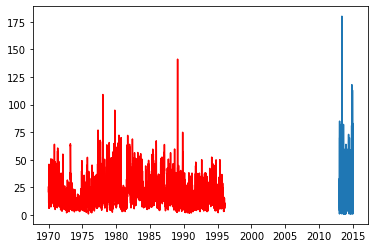

In [21]:
X = series5.values
train, test = train_test_split(series2, test_size = 0.2, shuffle = False)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict = output[0]
    predictions.append(predict)
    real = test[t]
    history.append(real)
    print('predicted=%f, expected=%f' % (predict, real))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [22]:
len(predictions)

9506